In [111]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('~/Downloads/covtype.csv')

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

In [6]:
df.duplicated().sum()

0

In [7]:
# profile = df.profile_report(title='Pandas Profiling Report', plot={'histogram': {'bins': 8}})
# profile.to_file(output_file="output.html")

In [8]:
df.Wilderness_Area1.value_counts()

0    320216
1    260796
Name: Wilderness_Area1, dtype: int64

In [123]:
df.loc[:, df.columns != 'Cover_Type']

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,0
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,0
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,0
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,0


# Logistic Regression 

In [124]:
y = df['Cover_Type']
X = df.loc[:, df.columns != 'Cover_Type']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.25 )

In [126]:
ss = MinMaxScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [44]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')


model_log = logreg.fit(X_train_sc, y_train)


y_pred = logreg.predict(X_test_sc)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [48]:
confusion_matrix(y_test, y_pred)

array([[36617, 15351,    40,     0,     3,     2,   993],
       [12548, 56288,  1638,     2,    84,   127,    89],
       [    0,   938,  7536,    90,     2,   343,     0],
       [    0,     0,   389,   198,     0,    64,     0],
       [   53,  2135,   250,     0,    34,     1,     0],
       [    0,  1554,  2362,    30,    14,   413,     0],
       [ 2307,    37,    21,     0,     0,     0,  2700]])

In [49]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.71


# Decision Tree

In [117]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)

clf.fit(X_train_sc, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [118]:
y_pred = clf.predict(X_test_sc)  

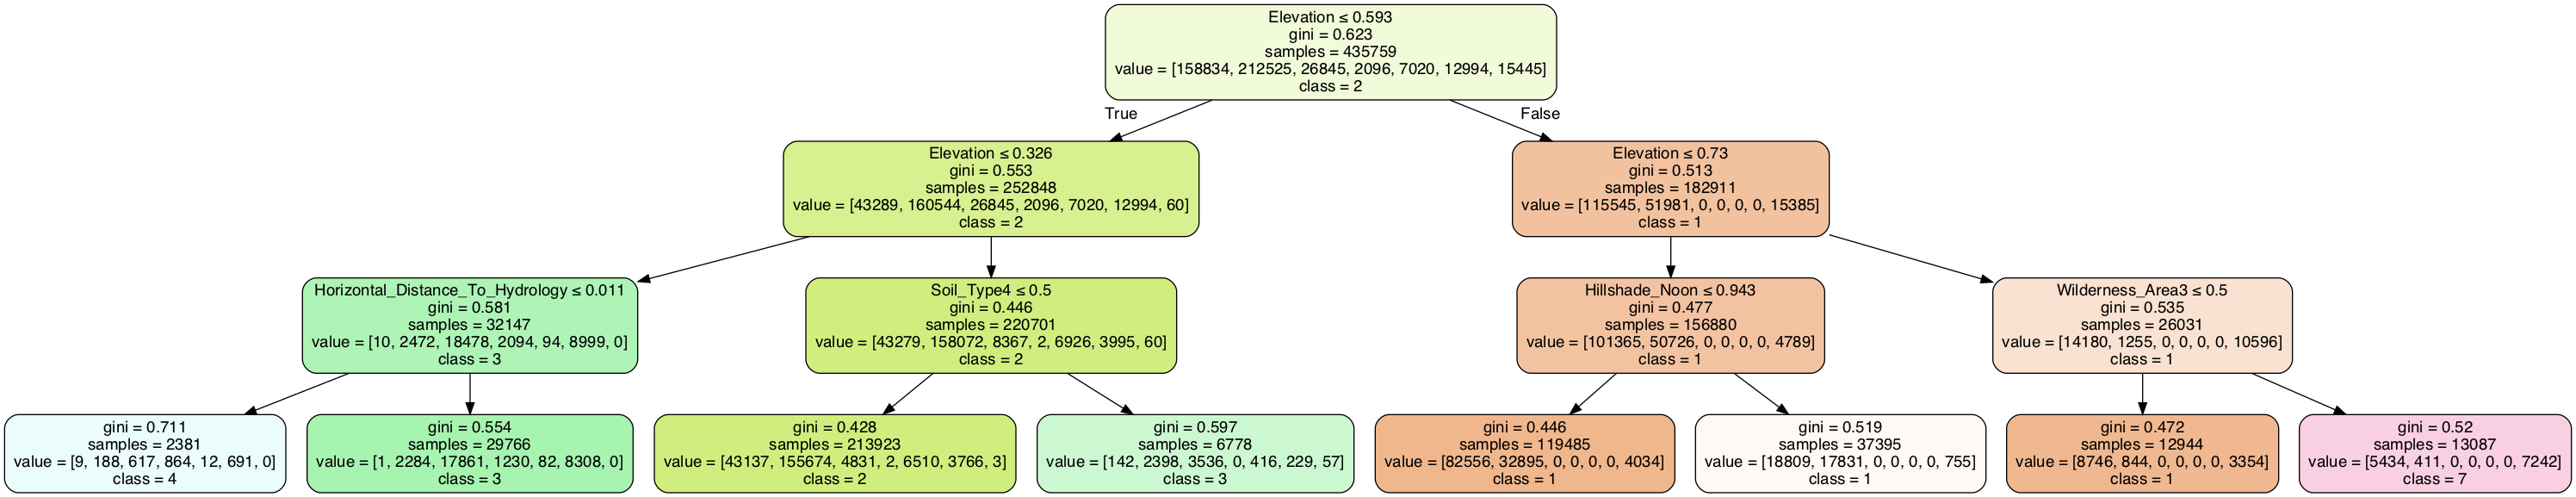

In [137]:
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

Accuracy is :67.5944730917778


In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(19,24),'min_samples_leaf':[5,10,15]}

opt_model = GridSearchCV(clf,param_grid,cv=3,scoring='accuracy')
opt_model.fit(X_train,y_train)
best_model = opt_model.best_estimator_

opt_model.best_params_

{'max_depth': 23, 'min_samples_leaf': 5}

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.148703,0.069908,0.082866,0.004179,19,5,"{'max_depth': 19, 'min_samples_leaf': 5}",0.886380,0.892553,0.895938,0.891624,0.003957,8
1,4.079219,0.016119,0.074592,0.002338,19,10,"{'max_depth': 19, 'min_samples_leaf': 10}",0.878683,0.884780,0.887112,0.883525,0.003554,13
2,4.105929,0.136537,0.072260,0.002894,19,15,"{'max_depth': 19, 'min_samples_leaf': 15}",0.872942,0.878660,0.881005,0.877536,0.003387,15
3,4.317145,0.141220,0.080532,0.005122,20,5,"{'max_depth': 20, 'min_samples_leaf': 5}",0.892672,0.899073,0.903243,0.898329,0.004347,5
4,4.136321,0.075549,0.075119,0.002434,20,10,"{'max_depth': 20, 'min_samples_leaf': 10}",0.883915,0.890157,0.894231,0.889434,0.004242,10
5,4.025641,0.015515,0.073584,0.000437,20,15,"{'max_depth': 20, 'min_samples_leaf': 15}",0.876645,0.882681,0.886919,0.882082,0.004216,14
6,4.211477,0.019889,0.074173,0.001128,21,5,"{'max_depth': 21, 'min_samples_leaf': 5}",0.897863,0.903417,0.908269,0.903183,0.004251,3
7,4.921446,0.556080,0.101556,0.024164,21,10,"{'max_depth': 21, 'min_samples_leaf': 10}",0.889127,0.893655,0.898065,0.893616,0.003649,7
8,4.615777,0.320283,0.078723,0.002266,21,15,"{'max_depth': 21, 'min_samples_leaf': 15}",0.881423,0.885765,0.890651,0.885946,0.003769,12
9,4.608153,0.371673,0.084184,0.009958,22,5,"{'max_depth': 22, 'min_samples_leaf': 5}",0.901415,0.907961,0.913253,0.907543,0.004842,2


In [66]:
decT = DecisionTreeClassifier(criterion='entropy', max_depth=23, min_samples_leaf=5)

decT.fit(X_train_sc, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=23,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
y_hat_pred = decT.predict(X_test_sc) 

In [69]:
acc = accuracy_score(y_test,y_hat_pred) * 100
print('Accuracy is :{0}'.format(acc))

Accuracy is :91.74681417939733


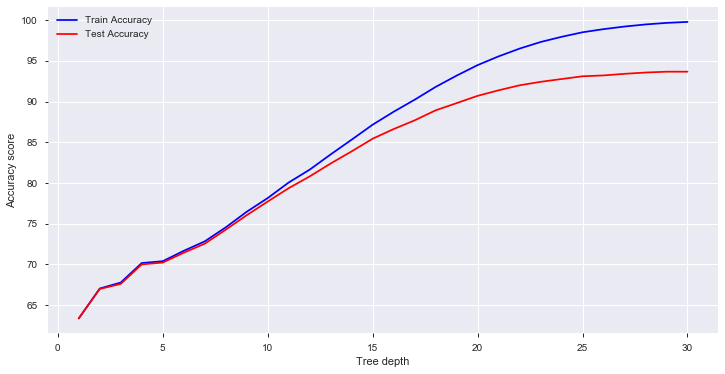

In [145]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 30, 30, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=42)
   dt.fit(X_train_sc, y_train)
   train_pred = dt.predict(X_train_sc)
   
   acc = accuracy_score(y_train,train_pred) * 100
   # Add acc score to previous train results
   train_results.append(acc)
   y_pred = dt.predict(X_test_sc)
   
   acc = accuracy_score(y_test,y_pred) * 100
   # Add auc score to previous test results
   test_results.append(acc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
plt.plot(max_depths, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

In [149]:
min_samples_leafs = np.linspace(1, 10, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='gini', min_samples_leaf=min_samples_leaf, random_state=42)
   dt.fit(X_train_sc, y_train)
   train_pred = dt.predict(X_train_sc)
   acc = accuracy_score(y_train,train_pred) * 100   
   train_results.append(acc)
   y_pred = dt.predict(X_test)
   acc = accuracy_score(y_train,train_pred) * 100   
   test_results.append(acc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train Accuracy')
plt.plot(min_samples_leafs, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 1.0

In [158]:
x=min_samples_leaf.astype(int)
x

1

# Random Forest 

In [103]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=23), 
                                 n_estimators=20)

In [104]:
bagged_tree.fit(X_train_sc, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=23,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

In [105]:
bagged_tree.score(X_train_sc, y_train)

0.9832292620462229

In [106]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 23)
forest.fit(X_train_sc, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=23, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
forest.score(X_train_sc, y_train)

0.9603381685748315

In [110]:
forest.score(X_test_sc, y_test)

0.9186522825690348

# XGBoost

In [116]:
# Instantiate XGBClassifier
Xgb = XGBClassifier(max_depth=5)

# Fit XGBClassifier
Xgb.fit(X_train_sc, y_train)

# Predict on training and test sets
training_preds = Xgb.predict(X_train_sc)
test_preds = Xgb.predict(X_test_sc)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))


KeyboardInterrupt: 

In [113]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [10],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [114]:
grid_clf = GridSearchCV(Xgb, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

NameError: name 'Xgb' is not defined